# Assignment 1 - The Power Plant Energy

### Description
This assignment is an assessment of a Power Plant's power output data given the inputs of ambient temperature, exhaust vacuum, ambient pressure, and relative humidity, as well as the output of electrical energy. Predictions of the energy ouput using Multiple Regression and SVM Regression will be performed on the dataset to build a model.

# 1 Program Setup

## 1.0 Import Libraries & Functions

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Import Data

In [6]:
PPDat = pd.read_csv('Power Plant Data.csv')

# 2 Data Pre-processing

## 2.0 Presentation of the Raw Data

In [9]:
# Review of some of the existing data
PPDat.head()

,Ambient Temperature (C),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%),Hourly Electrical Energy output (MW)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## 2.1 Removal of Unnecessary Data

In [11]:
# It is not apparent that any data is irrelevant to the electrical output

## 2.2 Filling Missing Data

In [13]:
# Review of the dataset info
PPDat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Ambient Temperature (C)               9568 non-null   float64
 1   Exhaust Vacuum (cm Hg)                9568 non-null   float64
 2   Ambient Pressure (milibar)            9568 non-null   float64
 3   Relative Humidity (%)                 9568 non-null   float64
 4   Hourly Electrical Energy output (MW)  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


It is not apparent that there are any missing data to find.

## 2.3 Removal of Outliers

In [16]:
# Review to check for outliers from standard deviation of +/-3
PPDat.describe()

,Ambient Temperature (C),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%),Hourly Electrical Energy output (MW)
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [17]:
# Constructing table using dataframe (Help from Anaconda Assistant)
data = pd.DataFrame(PPDat)
headers = data.columns

# Running through each variable to check for possible outliers, outputting resultant from Z-score (Help from Anaconda Assistant)
for head in headers:
    mean = data[head].mean()
    std = data[head].std()
    min = data[head].min()
    max = data[head].max()
    z_min = round((min-mean)/std,2)
    z_max = round((max-mean)/std,2)

    # Run through verification for any possible outliers
    if z_min > 3 or z_max > 3:
        if z_min > 3 and z_min > 3:
            print("For the ", head, "both the upper and lower limits exceed the Z-score of 3, there are outliers on both ends.")
            print("The Z-scores are: ", z_min, " and ", z_max, ".")
        elif z_min < -3:
            print("For the ", head, "the lower limit exceeds the Z-score of -3. There are outliers to consider.")
            print("The Z-score is: ", z_min, ".")
        else:
            print("For the ", head, "the upper limit exceeds the Z-score of 3. There are outliers to consider.")
            print("The Z-score is: ", z_max, ".")
    else:
        print("For the ", head, "there are no outliers to consider outside of the Z-score of +/-3.")

For the  Ambient Temperature (C)  there are no outliers to consider outside of the Z-score of +/-3.
For the  Exhaust Vacuum (cm Hg) there are no outliers to consider outside of the Z-score of +/-3.
For the  Ambient Pressure (milibar) the lower limit exceeds the Z-score of -3. There are outliers to consider.
The Z-score is:  -3.43 .
For the  Relative Humidity (%) there are no outliers to consider outside of the Z-score of +/-3.
For the  Hourly Electrical Energy output (MW) there are no outliers to consider outside of the Z-score of +/-3.


The Z-score found is not too far off of -3, and based on the scale of the data the minimum is not too far off (~2% from the mean) and so few outliers at that. For now will retain all of the data to see the results, and will verify the significance of the outliers.

## 2.4 Encoding Categorical Data

In [20]:
# There is no categorical data, this is not required.

## 2.5 Separation of Input/Output

In [22]:
# Establishing the X & Y values
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [23]:
# Checking the X values
pd.DataFrame(X)

,0,1,2,3
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [24]:
# Checking the Y values
pd.DataFrame(Y)

,0
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


## 2.6 Splitting Training and Test Sets

In [26]:
# Separation of 80% of the data for training and 20% for testing (source: General Data Preprocessing Setup Template from MANU 465)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## 2.7 Data Scaling

In [28]:
# Scaling data to fit (source: General Data Preprocessing Setup Template from MANU 465)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Scaling functions
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)


In [29]:
pd.DataFrame(X_train_sc)

,0,1,2,3
0,-1.135728,-0.886856,0.673579,0.520706
1,-0.806302,-0.009716,0.451455,0.145310
2,1.771284,1.847434,0.242792,-1.883741
3,1.646237,1.052747,-0.753401,-1.375451
4,-1.250018,-1.328960,-0.007939,0.407676
...,...,...,...,...
7649,-0.464776,-0.276706,-0.130780,0.763890
7650,-0.782100,-0.747864,0.988255,0.239159
7651,-0.384100,-1.248863,0.845220,0.130925
7652,-0.923282,-1.041553,1.546931,0.883085


In [30]:
pd.DataFrame(Y_train)

,0
0,473.93
1,467.87
2,431.97
3,425.28
4,473.10
...,...
7649,462.68
7650,467.20
7651,459.01
7652,462.72


In [31]:
pd.DataFrame(X_test_sc)

,0,1,2,3
0,1.207600,1.916035,-0.639525,-0.293025
1,-0.280877,-0.353102,1.378697,0.765470
2,-0.629697,-0.849675,0.990252,1.765768
3,0.382148,0.357195,-0.023081,-0.319727
4,-0.161053,0.114868,1.160830,-0.343690
...,...,...,...,...
1909,-0.394044,-1.165892,-1.266102,-0.091048
1910,-0.418008,0.752864,0.441364,0.727128
1911,-0.978517,-0.708251,1.755319,1.017427
1912,1.023870,-0.469101,-1.669747,-0.967421


In [32]:
pd.DataFrame(Y_test)

,0
0,431.23
1,460.01
2,461.14
3,445.90
4,451.29
...,...
1909,460.29
1910,452.42
1911,473.26
1912,438.00


Data appears to be split and scaled correctly

# 3 Data Regression

## 3.0 Multiple Linear Regression Method

In [36]:
# Creating a model with multiple regression method as follows (Using help from Anaconda assistant).
from sklearn.linear_model import LinearRegression
model_MLRM = LinearRegression()
model_MLRM.fit(X_train_sc, Y_train)

LinearRegression()

## 3.1 Testing Multiple Linear Regression Method

In [38]:
# Using the test data to verify the ultimate result
Y_pred_MLRM = model_MLRM.predict(X_test_sc)
pd.DataFrame([Y_pred_MLRM, Y_test])

,0,1,2,3,4,5,6,7,8,9,...,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913
0,431.244974,458.24537,462.404042,448.348531,457.554298,429.561865,472.628239,456.215965,473.927548,446.144603,...,435.073621,433.687866,441.652493,461.307804,470.137293,463.326369,456.659502,469.114112,442.289588,461.585023
1,431.230000,460.01000,461.140000,445.900000,451.290000,432.680000,477.500000,459.680000,477.500000,444.990000,...,440.740000,439.330000,439.040000,462.800000,466.550000,460.290000,452.420000,473.260000,438.000000,463.280000


Based on these results, the model appears to be functioning correctly and in the range expected.

## 3.2 SVR Regression Method

In [41]:
from sklearn.svm import SVR
model_SVR = SVR(kernel = 'rbf')
model_SVR.fit(X_train_sc, Y_train)

SVR()

## 3.3 SVR method Testing SVR Method

In [43]:
Y_pred_SVR = model_SVR.predict(X_test_sc)
pd.DataFrame([Y_pred_MLRM, Y_test])

,0,1,2,3,4,5,6,7,8,9,...,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913
0,431.244974,458.24537,462.404042,448.348531,457.554298,429.561865,472.628239,456.215965,473.927548,446.144603,...,435.073621,433.687866,441.652493,461.307804,470.137293,463.326369,456.659502,469.114112,442.289588,461.585023
1,431.230000,460.01000,461.140000,445.900000,451.290000,432.680000,477.500000,459.680000,477.500000,444.990000,...,440.740000,439.330000,439.040000,462.800000,466.550000,460.290000,452.420000,473.260000,438.000000,463.280000


Again we see that the model runs as expected with results close to the original.

# 4 Conclusions

## 4.0 Performance of Multiple Linear Regression Method

In [47]:
# Calculating the r^2 value
from sklearn.metrics import r2_score
r2_MLRM = r2_score(Y_pred_MLRM, Y_test)
print('r^2: ', r2_MLRM)

r^2:  0.9264012569334773


This R^2 value shows a high correlation between the input data and the MLRM model.

## 4.1 Performance of SVR method

In [50]:
# Calculating the r^2 value
r2_SVR = r2_score(Y_pred_SVR, Y_test)
print('r^2: ', r2_SVR)

r^2:  0.9399030223208621


This R^2 value shows a high correlation between the input data and the SVR model.

## 4.2 Conclusion

In [53]:
print("Based on the comparison of the methodologies in terms of the highest",
      "r^2 value, the most accurate method of the two compared methods is the: ")
if (1-abs(r2_SVR)) < (1-abs(r2_MLRM)):
    print("SVR method")
else:
    print("MLRM method")

Based on the comparison of the methodologies in terms of the highest r^2 value, the most accurate method of the two compared methods is the: 
SVR method


## 4.3 Data Illustrated

One can see from the following graphs the relative accuracy using the test values to how well  they SVR and MLRM predictions work, based on the R^2 values provided in the previous sections. The resultant y values from each regression prediction is plotted against each x values for better clarity.

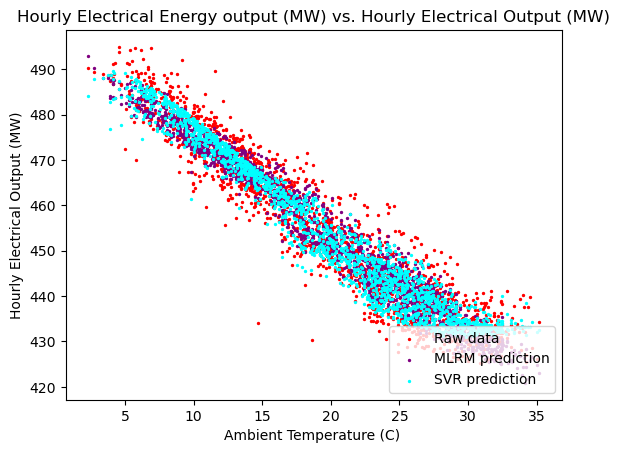

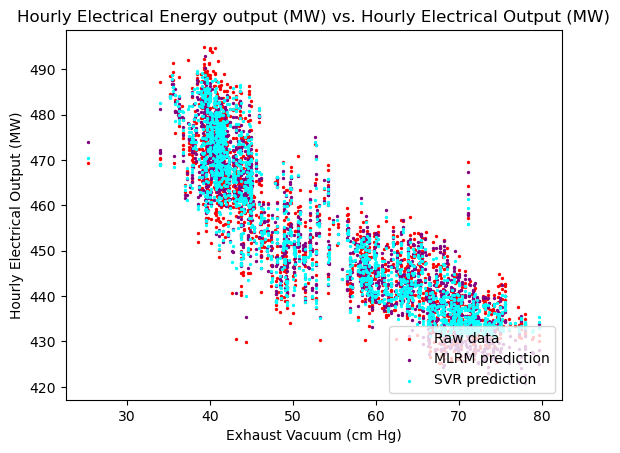

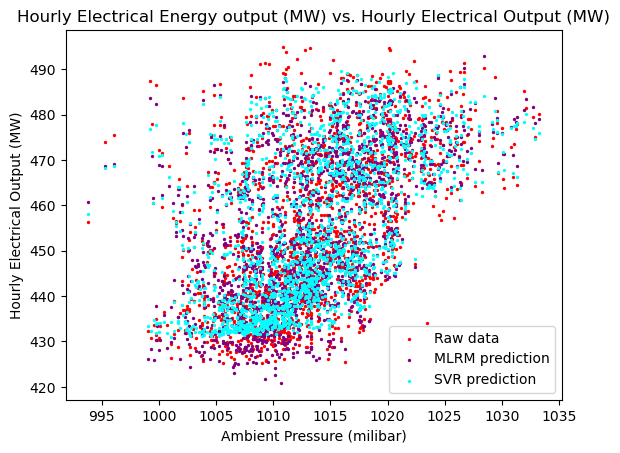

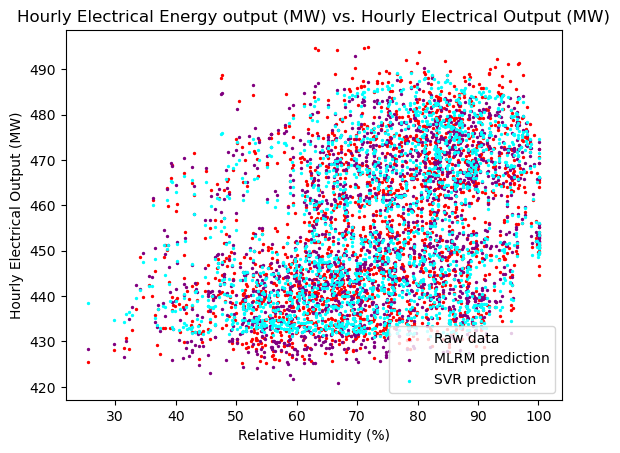

In [56]:
# Printing each X variable against Y
for i in range(4):
    
    #Original Data
    plt.scatter(X_test[:,i], Y_test, color = 'red', label = "Raw data", s = 2)

    #MLRM Plot
    plt.scatter(X_test[:,i], Y_pred_MLRM, color = 'purple', label = "MLRM prediction", s = 2)

    #SVR Plot
    plt.scatter(X_test[:,i], Y_pred_SVR, color = 'cyan', label = "SVR prediction", s = 2)

    # Plot labels
    ti = head + " vs. Hourly Electrical Output (MW)"
    plt.title(ti)
    plt.xlabel(headers[i])
    plt.ylabel('Hourly Electrical Output (MW)')
    leg = plt.legend(loc='lower right')
    plt.show()

